### Q1a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform
from scipy.stats import randint

In [ ]:
# ./plink2 --bfile data --glm allow-no-covars --out data
df = pd.read_csv('data.PHENO1.glm.linear', sep='\t')
df

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE
0,1,3000185,rs585444580,G,T,T,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
1,1,3000325,rs586608136,G,T,G,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
2,1,3001278,rs581216520,G,A,G,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
3,1,3001490,rs31521921,C,A,A,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
4,1,3004940,rs578487906,C,T,T,ADD,881,-0.022153,0.024483,-0.904842,0.365797,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523023,19,61251379,rs223819982,T,C,T,ADD,881,0.021706,0.029286,0.741173,0.458787,.
523024,19,61252455,rs45698052,C,T,C,ADD,881,0.021706,0.029286,0.741173,0.458787,.
523025,19,61254810,rs30451365,G,A,G,ADD,881,0.021706,0.029286,0.741173,0.458787,.
523026,19,61281615,rs31087134,C,T,T,ADD,881,0.021706,0.029286,0.741173,0.458787,.


In [ ]:
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['minuslog10pvalue'] = -np.log(df['P'])
df['index'] = range(len(df))
df_grouped = df.groupby(('#CHROM'))

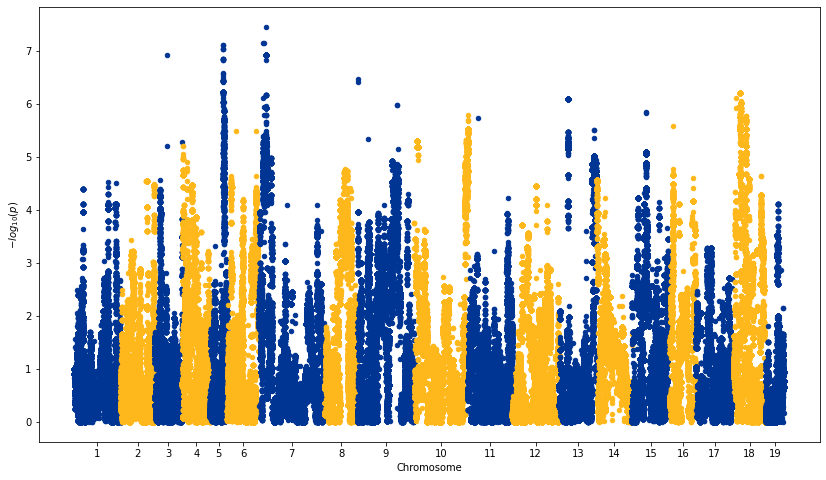

In [ ]:
# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
#colors = ['darkred','darkgreen','darkblue', 'gold']
colors = ['#003594', '#FFB81C']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='index', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['index'].iloc[-1] - (group['index'].iloc[-1] - group['index'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
# ax.set_xlim([0, len(df)])
# ax.set_ylim([0, 3.5])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('$-log_{10}(p)$')

# show the graph
plt.show()

In [ ]:
print(df['minuslog10pvalue'].max())
print(df['minuslog10pvalue'].idxmax())
df.loc[[df['minuslog10pvalue'].idxmax()]]

7.450956033789865
140995


,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE,index,minuslog10pvalue
140995,7,34440906,rs32316278,C,T,T,ADD,881,-0.078065,0.022608,-3.45299,0.000581,.,140995,7.450956


### Q1b

In [ ]:
# Run PCA to find the PCs of the GRM
#./plink2 --bfile data --pca 1063 --out data

In [ ]:
eigenval = np.loadtxt('data.eigenval')
len(eigenval)

1063

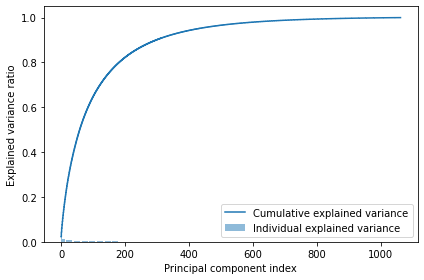

In [ ]:
# Determine explained variance
total_eigenval = sum(eigenval)
var_exp = [(i/total_eigenval) for i in sorted(eigenval, reverse=True)]

# Plot the explained variance against cumulative explained variance
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

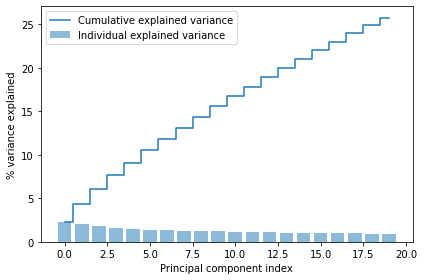

In [ ]:
plt.bar(range(0,20), np.array(var_exp[:20])*100, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,20), np.array(cum_sum_exp[:20])*100, where='mid',label='Cumulative explained variance')
plt.ylabel('% variance explained')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Q1c

In [ ]:
#./plink2 --bfile data --glm hide-covar --out datapca --covar data.eigenvec --covar-name PC1-PC150
# Running this command should generate a new tab-delimited file called datapca.PHENO1.glm.linear, 
# and you can again read this directly into a pandas.DataFrame.

In [ ]:
df = pd.read_csv('datapca.PHENO1.glm.linear', sep='\t')
df

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE
0,1,3000185,rs585444580,G,T,T,ADD,881,0.016122,0.072778,0.221528,0.824744,.
1,1,3000325,rs586608136,G,T,G,ADD,881,0.016122,0.072778,0.221528,0.824744,.
2,1,3001278,rs581216520,G,A,G,ADD,881,0.016122,0.072778,0.221528,0.824744,.
3,1,3001490,rs31521921,C,A,A,ADD,881,0.016122,0.072778,0.221528,0.824744,.
4,1,3004940,rs578487906,C,T,T,ADD,881,0.016122,0.072778,0.221528,0.824744,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523023,19,61251379,rs223819982,T,C,T,ADD,881,0.123692,0.059263,2.087170,0.037220,.
523024,19,61252455,rs45698052,C,T,C,ADD,881,0.123692,0.059263,2.087170,0.037220,.
523025,19,61254810,rs30451365,G,A,G,ADD,881,0.123692,0.059263,2.087170,0.037220,.
523026,19,61281615,rs31087134,C,T,T,ADD,881,0.123692,0.059263,2.087170,0.037220,.


In [ ]:
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['minuslog10pvalue'] = -np.log(df['P'])
df['index'] = range(len(df))
df_grouped = df.groupby(('#CHROM'))

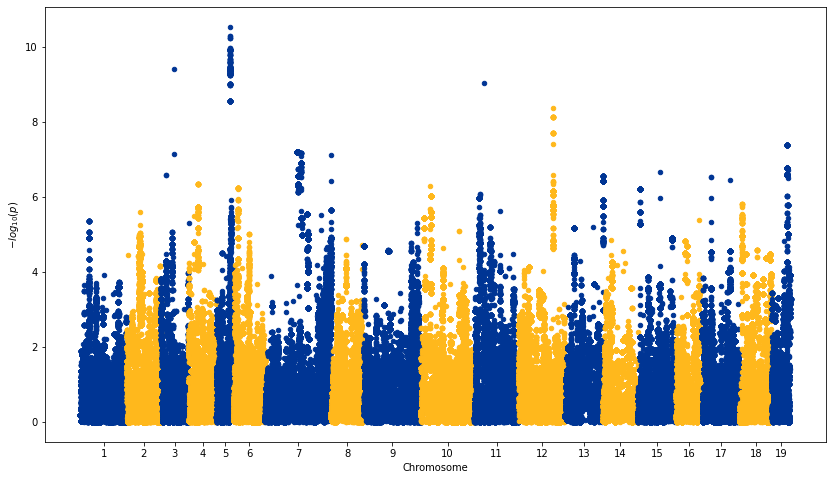

In [ ]:
# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
#colors = ['darkred','darkgreen','darkblue', 'gold']
colors = ['#003594', '#FFB81C']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='index', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['index'].iloc[-1] - (group['index'].iloc[-1] - group['index'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
# ax.set_xlim([0, len(df)])
# ax.set_ylim([0, 3.5])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('$-log_{10}(p)$')

# show the graph
plt.show()

In [ ]:
print(df['minuslog10pvalue'].max())
print(df['minuslog10pvalue'].idxmax())
df.loc[[df['minuslog10pvalue'].idxmax()]]

10.546261061431908
110210


,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE,minuslog10pvalue,index
110210,5,127336822,rs47266400,T,C,C,ADD,881,-0.146281,0.034578,-4.23048,0.000026,.,10.546261,110210


0.754388411254763


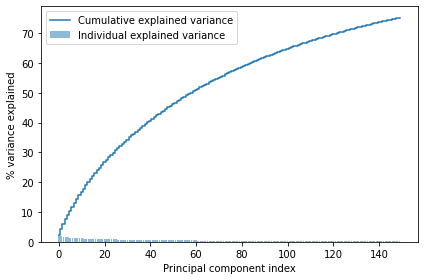

In [ ]:
# Calculate the % variance explained for the first 150 PCs.
print(cum_sum_exp[150])

plt.bar(range(0,150), np.array(var_exp[:150])*100, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,150), np.array(cum_sum_exp[:150])*100, where='mid',label='Cumulative explained variance')
plt.ylabel('% variance explained')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Q2a

In [ ]:
combined_50Kb_df = pd.read_csv('combined_50Kb.txt', sep='\t', names=["POS_i", "POS_j", "norm_cont_freq"])
combined_50Kb_df

,POS_i,POS_j,norm_cont_freq
0,7500000,7500000,3318.03120
1,7500000,7550000,924.91956
2,7550000,7550000,3056.81670
3,7500000,7600000,468.59213
4,7550000,7600000,1226.95760
...,...,...,...
1321,9800000,10000000,394.37747
1322,9850000,10000000,397.79770
1323,9900000,10000000,475.96063
1324,9950000,10000000,1099.63300


In [ ]:
# reshape
combined_50Kb_matrix_df = combined_50Kb_df.pivot(index='POS_i', columns='POS_j', values='norm_cont_freq')
df = combined_50Kb_matrix_df.copy()
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if i > j:
            df.iloc[i,j] = df.iloc[j,i]
df

POS_j,7500000,7550000,7600000,7650000,7700000,7750000,7800000,7850000,7900000,7950000,...,9550000,9600000,9650000,9700000,9750000,9800000,9850000,9900000,9950000,10000000
POS_i,,,,,,,,,,,,,,,,,,,,,
7500000,3318.031200,924.919560,468.592130,394.307600,438.695860,333.165740,191.272900,181.918430,165.952300,135.868200,...,27.724258,18.073038,19.370270,14.655106,31.995960,33.690390,43.555122,31.478537,29.939798,19.015300
7550000,924.919560,3056.816700,1226.957600,799.973100,818.943600,474.981750,278.399380,262.701200,247.048510,172.669880,...,26.948687,23.218523,26.958841,28.431410,35.396294,30.181469,34.195023,35.291946,30.866020,31.757769
7600000,468.592130,1226.957600,3505.008000,1288.637000,709.148440,466.911800,282.473540,262.742980,187.733140,149.708340,...,25.848627,20.738880,33.862150,32.295883,36.715490,36.826847,39.567240,30.571789,26.880417,22.456553
7650000,394.307600,799.973100,1288.637000,3402.879400,1217.184400,499.072400,291.370820,255.364240,217.963060,155.343400,...,27.353132,34.868114,22.442822,36.320274,29.522785,31.670937,30.445807,34.326332,35.066784,45.618260
7700000,438.695860,818.943600,709.148440,1217.184400,3200.482700,1200.682600,422.485440,348.203520,235.269300,207.365260,...,23.467949,12.356409,31.085010,26.314083,23.090715,26.387478,41.910248,32.382122,27.377077,23.786333
7750000,333.165740,474.981750,466.911800,499.072400,1200.682600,3351.102500,1069.739300,547.483950,374.913800,261.415200,...,29.071856,22.960491,24.437640,24.448215,19.195154,39.439434,30.740915,25.272224,24.418400,18.610275
7800000,191.272900,278.399380,282.473540,291.370820,422.485440,1069.739300,3682.696000,1447.440000,419.083920,348.927150,...,22.885551,18.744078,12.824977,23.094950,23.702820,27.970247,27.963802,44.209904,19.222320,26.858566
7850000,181.918430,262.701200,262.742980,255.364240,348.203520,547.483950,1447.440000,3293.363800,940.996900,478.572940,...,34.562244,26.690120,34.863396,30.228018,33.290750,43.592980,39.957523,40.060043,29.029959,18.806194
7900000,165.952300,247.048510,187.733140,217.963060,235.269300,374.913800,419.083920,940.996900,2920.734000,1262.661400,...,38.535297,32.463540,27.091955,38.887886,37.117638,37.300858,46.723990,33.179780,23.735840,28.368515


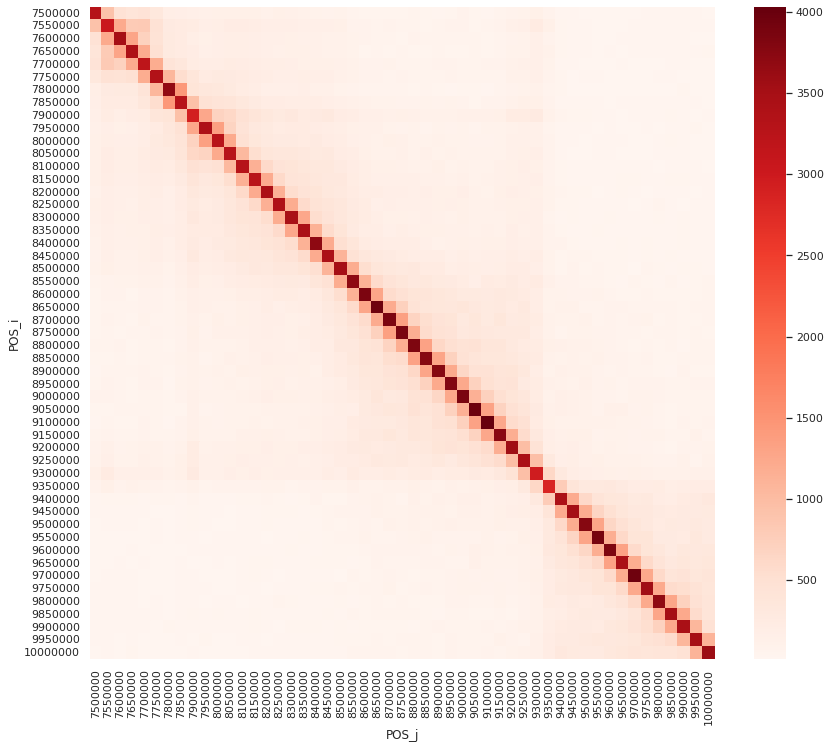

In [ ]:
# library
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(rc={'figure.figsize':(14,12)})

# Default heatmap
p1 = sns.heatmap(df, cmap='Reds')

### Q2c

In [3]:
combined_50Kb_extended_df = pd.read_csv('combined_50Kb_extended.txt', sep='\t', names=["POS_i", "POS_j", "norm_cont_freq"])
combined_50Kb_extended_df

,POS_i,POS_j,norm_cont_freq
0,4500000,4500000,3947.65380
1,4500000,4550000,1220.64970
2,4550000,4550000,3673.85640
3,4500000,4600000,647.84406
4,4550000,4600000,1382.96030
...,...,...,...
14654,12800000,13000000,497.87723
14655,12850000,13000000,594.05330
14656,12900000,13000000,766.77850
14657,12950000,13000000,1500.58790


In [4]:
# reshape
combined_50Kb_extended_matrix_df = combined_50Kb_extended_df.pivot(index='POS_i', columns='POS_j', values='norm_cont_freq')
df = combined_50Kb_extended_matrix_df.copy()
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if i > j:
            df.iloc[i,j] = df.iloc[j,i]
df

POS_j,4500000,4550000,4600000,4650000,4700000,4750000,4800000,4850000,4900000,4950000,...,12550000,12600000,12650000,12700000,12750000,12800000,12850000,12900000,12950000,13000000
POS_i,,,,,,,,,,,,,,,,,,,,,
4500000,3947.653800,1220.649700,647.844060,529.453000,430.504900,358.374450,290.517640,73.265020,51.992085,55.961674,...,10.071364,13.002028,9.794182,12.882620,4.755631,10.190960,11.923224,9.614625,7.916920,7.095855
4550000,1220.649700,3673.856400,1382.960300,701.408000,482.371670,476.971900,308.370600,76.449230,48.826565,54.699547,...,1.050908,2.616515,9.197866,8.065511,4.466086,7.656390,10.179349,10.032491,6.505538,7.615802
4600000,647.844060,1382.960300,3674.350800,1165.638500,592.023900,527.896700,348.043550,81.188660,48.325047,64.211350,...,8.830355,6.412442,9.660742,6.353551,7.505342,16.083384,6.414970,10.537369,11.713584,9.998826
4650000,529.453000,701.408000,1165.638500,3751.828900,1128.071400,650.833400,390.661930,87.924560,63.430847,61.936325,...,4.580161,5.701764,4.454106,12.083439,3.892899,8.342189,11.091135,4.372449,10.126076,2.074491
4700000,430.504900,482.371670,592.023900,1128.071400,3238.475800,1286.056200,602.699700,146.329820,78.401184,95.209680,...,10.160232,9.198763,12.575314,7.974997,3.925304,6.729305,11.630798,5.290616,8.985124,11.713856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800000,10.190960,7.656390,16.083384,8.342189,6.729305,7.887993,8.221025,6.680448,9.599998,7.591560,...,293.405400,343.648700,377.761260,485.253020,1366.317600,3866.505000,1411.390700,786.645200,554.024960,497.877230
12850000,11.923224,10.179349,6.414970,11.091135,11.630798,8.389816,5.246421,7.105449,11.781619,11.663203,...,254.052520,291.095730,341.097400,408.176640,726.246900,1411.390700,4091.422000,1379.658200,649.908750,594.053300
12900000,9.614625,10.032491,10.537369,4.372449,5.290616,11.025035,9.479673,7.002939,6.192878,3.536904,...,262.516780,291.929350,324.380740,435.534820,600.892760,786.645200,1379.658200,3927.075200,1373.007400,766.778500


In [13]:
for i in df.index:
    index = df[i].index[df[i].apply(np.isnan)]
    print(i, index)

4500000 Int64Index([11500000], dtype='int64', name='POS_i')
4550000 Int64Index([11850000], dtype='int64', name='POS_i')
4600000 Int64Index([12000000], dtype='int64', name='POS_i')
4650000 Int64Index([], dtype='int64', name='POS_i')
4700000 Int64Index([], dtype='int64', name='POS_i')
4750000 Int64Index([], dtype='int64', name='POS_i')
4800000 Int64Index([], dtype='int64', name='POS_i')
4850000 Int64Index([9550000], dtype='int64', name='POS_i')
4900000 Int64Index([9100000, 10600000], dtype='int64', name='POS_i')
4950000 Int64Index([], dtype='int64', name='POS_i')
5000000 Int64Index([], dtype='int64', name='POS_i')
5050000 Int64Index([], dtype='int64', name='POS_i')
5100000 Int64Index([9550000, 10150000, 10600000], dtype='int64', name='POS_i')
5150000 Int64Index([], dtype='int64', name='POS_i')
5200000 Int64Index([], dtype='int64', name='POS_i')
5250000 Int64Index([10500000], dtype='int64', name='POS_i')
5300000 Int64Index([], dtype='int64', name='POS_i')
5350000 Int64Index([], dtype='int

In [10]:
for i in df.index:
    df.isna(df[i])
    #df.loc[df.isna(df[i]), :].index)

TypeError: ignored

In [ ]:
print(np.where(df.index==7500000))
print(np.where(df.index==10000000))
print(2000000/50000)

(array([60]),)
(array([110]),)
40.0


In [ ]:
DI_df = pd.DataFrame(columns = ['bin', 'DI'])
for i in range(60,111):
    POS_i = str(df.index[i])
    A = sum(df.iloc[i, i-40:i])
    B = sum(df.iloc[i, i+1:i+41])
    E = (A + B)/2
    DI = ((B-A)/abs(B-A))*( (((A-E)**2)/E) + (((B-E)**2)/E) )
    DI_df = DI_df.append({'bin' : POS_i, 'DI' : DI}, ignore_index = True)
DI_df

,bin,DI
0,7500000,-48.759729
1,7550000,901.948868
2,7600000,162.023686
3,7650000,-0.785284
4,7700000,-7.652044
5,7750000,8.302608
6,7800000,20.750196
7,7850000,70.818684
8,7900000,1412.079637
9,7950000,296.878359


Text(0, 0.5, 'DI')

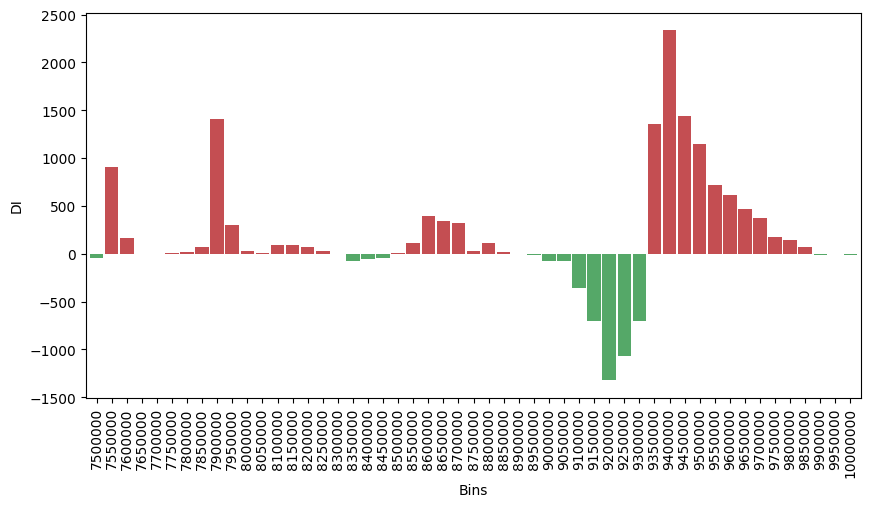

In [ ]:
# plt.style.use('default')
# plt.bar(DI_df['bin'], DI_df['DI'])
DI_df.plot.bar(x='bin', y='DI', width=0.9, color=(DI_df['DI'] > 0).map({True: 'r', False: 'g'}), legend=False, figsize=(10, 5))
plt.xlabel("Bins")
plt.ylabel("DI")

### Q2d

In [ ]:
eigen_df = pd.read_csv('eigen.txt', names=['eigen'])
eigen_df['bin'] = (eigen_df.index+1) * 50000
eigen_df

,eigen,bin
0,-0.023282,50000
1,-0.022728,100000
2,-0.020829,150000
3,-0.023889,200000
4,-0.020015,250000
...,...,...
4981,-0.010367,249100000
4982,0.003020,249150000
4983,0.008311,249200000
4984,-0.001588,249250000


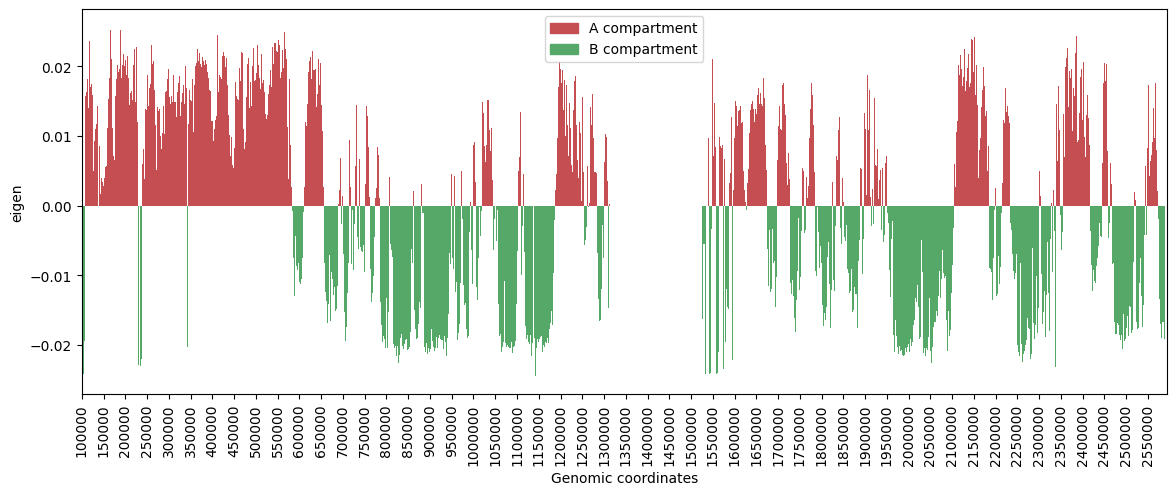

In [ ]:
#Imports
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches

ax = eigen_df.plot.bar(x='bin', y='eigen', width=1, color=(eigen_df['eigen'] > 0).map({True: 'r', False: 'g'}), legend=False, figsize=(14, 5))

ax.xaxis.set_major_locator(mticker.MultipleLocator(100))
plt.xlabel("Genomic coordinates")
plt.ylabel("eigen")

# manually define a new patch 
patchA = mpatches.Patch(color='r', label='A compartment')
patchB = mpatches.Patch(color='g', label='B compartment')

plt.legend(handles=[patchA, patchB], loc='best')

# Q3

In [ ]:
!pip install biopython
from Bio import SeqIO

In [ ]:
# read fasta files
Coronaviridae_2019_new = SeqIO.to_dict(SeqIO.parse("Coronaviridae_2019_new.fasta", "fasta"))
Coronaviridae_old = SeqIO.to_dict(SeqIO.parse("Coronaviridae_old.fasta", "fasta"))
#print(Coronaviridae_2019_new["404253"])  # use any record ID

In [ ]:
# read tables
new_information_df = pd.read_csv('Coronaviridae_2019_new_information_table.txt', sep='\t')
old_information_df = pd.read_csv('Coronaviridae_old_information_table.txt', sep='\t')

### Q3a

In [ ]:
import itertools
nucleotides = ['A','T','C','G']
k = 5
combinations = itertools.product(*itertools.repeat(nucleotides, k))
combinations = [''.join(kmer) for kmer in combinations]

new_kmer_df = pd.DataFrame(index = Coronaviridae_2019_new.keys(), columns = combinations)
for ID in Coronaviridae_2019_new.keys():
    record_h = Coronaviridae_2019_new[ID]
    seq_h = record_h.seq.upper()
    for kmer in combinations:
        new_kmer_df.loc[ID, kmer] = seq_h.count_overlap(kmer)

old_kmer_df = pd.DataFrame(index = Coronaviridae_old.keys(), columns = combinations)
for ID in Coronaviridae_old.keys():
    record_h = Coronaviridae_old[ID]
    seq_h = record_h.seq.upper()
    for kmer in combinations:
        old_kmer_df.loc[ID, kmer] = seq_h.count_overlap(kmer)

In [ ]:
print(new_kmer_df.shape)
print(old_kmer_df.shape)

(158, 1024)
(208, 1024)


In [ ]:
all_kmer_df = new_kmer_df.append(old_kmer_df)
all_kmer_df

,AAAAA,AAAAT,AAAAC,AAAAG,AAATA,AAATT,AAATC,AAATG,AAACA,AAACT,...,GGGTC,GGGTG,GGGCA,GGGCT,GGGCC,GGGCG,GGGGA,GGGGT,GGGGC,GGGGG
407214,56,69,59,66,45,94,37,68,75,56,...,1,20,11,14,3,3,4,5,5,1
411950,56,69,59,66,45,94,37,68,75,56,...,1,20,11,14,3,3,4,5,5,1
411915,56,69,59,66,45,94,37,68,75,56,...,1,20,11,14,3,3,4,5,5,1
408515,56,69,59,66,45,94,36,68,75,56,...,1,20,11,14,3,3,4,5,5,1
406970,56,69,59,66,45,94,37,68,75,56,...,1,20,11,14,3,3,4,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC_038294,42,50,38,33,43,51,18,43,44,49,...,9,16,12,19,9,4,3,4,7,2
NC_038861,52,83,55,58,32,86,33,65,48,66,...,2,16,6,10,4,0,5,6,3,1
NC_039207,71,73,41,51,43,74,28,70,65,34,...,5,13,12,8,5,5,2,5,2,3
NC_039208,37,36,52,27,26,40,22,27,45,41,...,6,11,18,8,3,4,9,1,6,5


In [ ]:
# normalization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
kmer_norm_df = scaler.fit_transform(all_kmer_df)
kmer_norm_df = pd.DataFrame(kmer_norm_df, index=all_kmer_df.index , columns=all_kmer_df.columns)
kmer_norm_df

,AAAAA,AAAAT,AAAAC,AAAAG,AAATA,AAATT,AAATC,AAATG,AAACA,AAACT,...,GGGTC,GGGTG,GGGCA,GGGCT,GGGCC,GGGCG,GGGGA,GGGGT,GGGGC,GGGGG
407214,0.575826,0.565053,0.887903,0.956065,0.632886,0.864130,0.874086,0.629509,0.986188,0.732818,...,-0.848618,0.028505,-0.012737,0.273585,-0.396813,-0.36650,-0.415139,-0.401284,0.222826,-0.643206
411950,0.575826,0.565053,0.887903,0.956065,0.632886,0.864130,0.874086,0.629509,0.986188,0.732818,...,-0.848618,0.028505,-0.012737,0.273585,-0.396813,-0.36650,-0.415139,-0.401284,0.222826,-0.643206
411915,0.575826,0.565053,0.887903,0.956065,0.632886,0.864130,0.874086,0.629509,0.986188,0.732818,...,-0.848618,0.028505,-0.012737,0.273585,-0.396813,-0.36650,-0.415139,-0.401284,0.222826,-0.643206
408515,0.575826,0.565053,0.887903,0.956065,0.632886,0.864130,0.745554,0.629509,0.986188,0.732818,...,-0.848618,0.028505,-0.012737,0.273585,-0.396813,-0.36650,-0.415139,-0.401284,0.222826,-0.643206
406970,0.575826,0.565053,0.887903,0.956065,0.632886,0.864130,0.874086,0.629509,0.986188,0.732818,...,-0.848618,0.028505,-0.012737,0.273585,-0.396813,-0.36650,-0.415139,-0.401284,0.222826,-0.643206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC_038294,-0.464559,-0.876392,-0.631336,-1.313908,0.359730,-1.535248,-1.568016,-1.492823,-0.872498,0.167823,...,1.393939,-0.678799,0.246239,1.440624,1.552629,0.05799,-0.823583,-0.752647,1.303016,0.010720
NC_038861,0.278573,1.627170,0.598524,0.405769,-1.142628,0.417734,0.359959,0.374829,-0.632667,1.539955,...,-0.568298,-0.678799,-1.307615,-0.660047,-0.071906,-1.63997,-0.006696,-0.049920,-0.857364,-0.643206
NC_039207,1.690524,0.868515,-0.414302,-0.075741,0.359730,-0.251860,-0.282699,0.799296,0.386612,-1.042882,...,0.272661,-1.209276,0.246239,-1.126863,0.253001,0.48248,-1.232026,-0.401284,-1.397459,0.664646
NC_039208,-0.836125,-1.938509,0.381490,-1.726631,-1.962095,-2.149043,-1.053889,-2.851116,-0.812540,-0.477887,...,0.552980,-1.562928,1.800093,-1.126863,-0.396813,0.05799,1.627078,-1.806738,0.762921,1.972498


#### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(kmer_norm_df)
data_pca = pca.transform(kmer_norm_df)

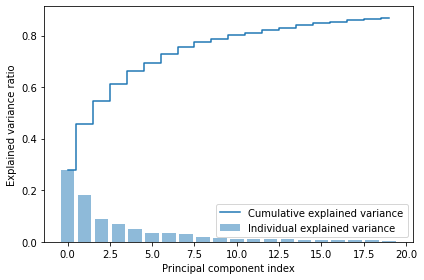

In [ ]:
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,20), exp_var_pca[:20], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,20), cum_sum_eigenvalues[:20], where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print(exp_var_pca[0], exp_var_pca[1])
print(cum_sum_eigenvalues[19])

0.2772531937487414 0.18026393409975724
0.86948021808143


In [ ]:
# choose 11 components to have >80% explained var
pca = PCA(n_components=20)
pca.fit(kmer_norm_df)
data_pca = pca.transform(kmer_norm_df)

In [ ]:
# # add column for short ID
# new_information_df['ID'] = [AccID[-6:] for AccID in new_information_df['Accession ID']]
# new_information_df['old_new'] = 'new'
# new_information_df

# old_information_df['ID'] = old_information_df['Accession ID']
# old_information_df.iloc[207,4] = '402131'
# old_information_df['old_new'] = 'old'
# old_information_df

# all_info_df = new_information_df[['ID', 'old_new']].append(old_information_df[['ID', 'old_new']], ignore_index=True)
# all_info_df.index = all_info_df['ID']
# list_old_new = []
# for ID in kmer_norm_df.index:
#     list_old_new.append(all_info_df.loc[ID, 'old_new'])
# arr_old_new = np.array(list_old_new)

In [ ]:
arr_old_new = np.array(['new'] * len(Coronaviridae_2019_new.keys()) + ['old'] * len(Coronaviridae_old.keys()))
arr_old_new

In [ ]:
len(data_pca[0])

11

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


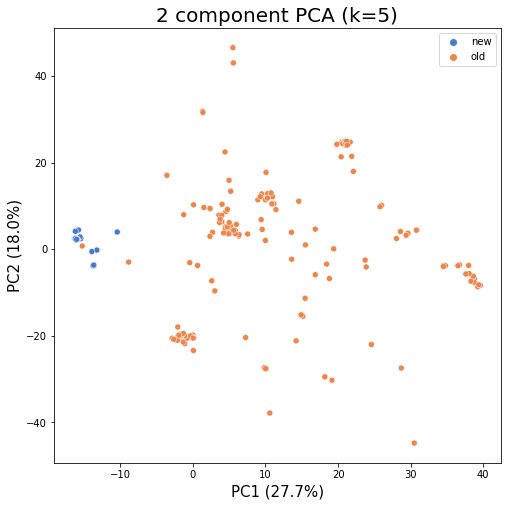

In [ ]:
plt.figure(figsize=(8,8))
plt.xlabel('PC1 (27.7%)', fontsize = 15)
plt.ylabel('PC2 (18.0%)', fontsize = 15)
plt.title('2 component PCA (k=5)', fontsize = 20)
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = arr_old_new, palette='muted')

#### Clustering

In [ ]:
from sklearn.cluster import KMeans
# Fit KMeans
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(data_pca)
    wcss.append(kmeans_pca.inertia_)

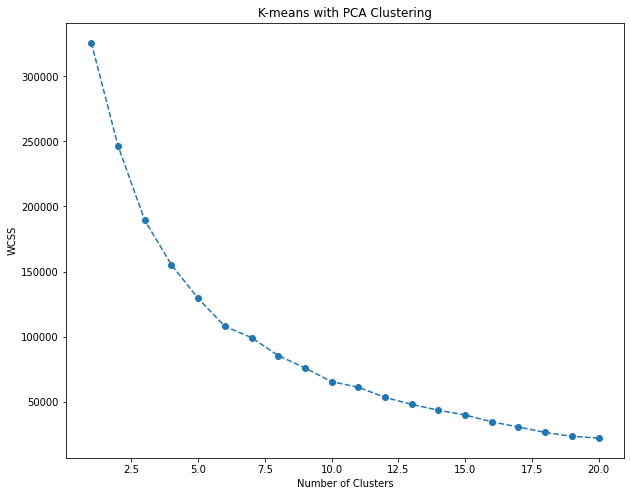

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
# keep 6-cluster solution
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans_pca.fit(data_pca)

KMeans(n_clusters=6, random_state=42)

In [ ]:
df_segm_pca_kmeans = pd.DataFrame(data_pca)
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans['old_new'] = arr_old_new
df_segm_pca_kmeans['ID'] = kmer_norm_df.index
df_segm_pca_kmeans

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Segment K-means PCA,old_new,ID
0,-16.204613,2.413519,-4.271391,4.025583,0.018517,-0.221540,0.032571,-0.221068,-0.440925,-0.170275,...,0.380199,-0.273242,0.010268,0.129935,-0.028222,0.088328,0.027467,0,new,407214
1,-16.155437,2.420599,-4.273789,4.014217,0.077801,-0.272622,0.038776,-0.229088,-0.417206,-0.196715,...,0.340320,-0.287138,0.017270,0.093990,-0.054155,0.015265,-0.024732,0,new,411950
2,-16.185566,2.437810,-4.272929,3.953680,0.045521,-0.272405,-0.023750,-0.195006,-0.407640,-0.138629,...,0.258890,-0.318370,-0.046055,0.043522,-0.027087,0.139845,-0.013395,0,new,411915
3,-16.142089,2.404477,-4.250711,4.022605,0.145267,-0.214101,-0.029092,-0.182189,-0.414420,-0.204055,...,0.347534,-0.298228,-0.004215,0.133952,-0.051974,-0.023439,0.016038,0,new,408515
4,-16.160593,2.382095,-4.273759,3.999940,0.065372,-0.265674,-0.009698,-0.149641,-0.430650,-0.162359,...,0.299996,-0.316916,-0.006104,0.061969,-0.044154,0.014688,-0.003835,0,new,406970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,14.914679,-15.161546,0.319173,5.317351,-2.440187,7.382058,-15.100261,-4.313907,11.875877,-2.792621,...,-7.411543,8.000390,1.528839,1.442137,-4.436925,2.345113,0.566370,1,old,NC_038294
362,-1.261141,7.951743,13.609186,-10.810055,-10.907425,-6.924154,-2.262441,-1.805497,0.679967,2.320824,...,0.172109,1.068826,3.283994,-3.290737,-2.086927,3.682760,4.000100,5,old,NC_038861
363,10.775772,12.990998,0.782556,-1.496693,0.445587,-4.432030,-2.341416,10.471999,12.411909,-2.182643,...,-2.980179,-6.247368,5.632973,1.525154,-4.623677,-1.417883,3.441078,5,old,NC_039207
364,10.015947,-27.548731,22.253704,14.695547,16.365968,-6.775726,-4.409548,0.440159,-5.599177,-0.945843,...,3.116509,3.260396,-3.537369,3.609881,0.175295,1.563388,0.616061,1,old,NC_039208


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


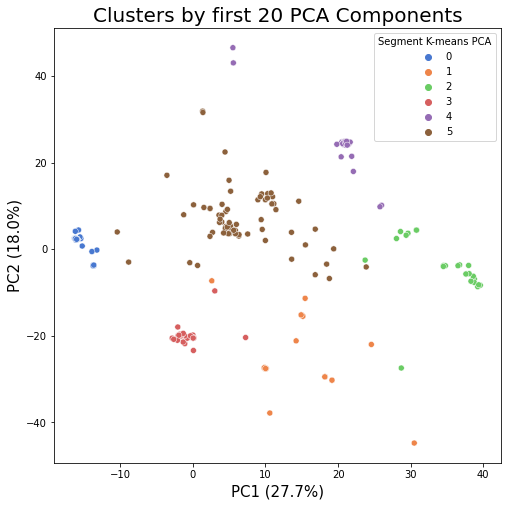

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))
plt.xlabel('PC1 (27.7%)', fontsize = 15)
plt.ylabel('PC2 (18.0%)', fontsize = 15)
plt.title('Clusters by first 20 PCA Components', fontsize = 20)
sns.scatterplot(df_segm_pca_kmeans[0], df_segm_pca_kmeans[1], hue = df_segm_pca_kmeans['Segment K-means PCA'], palette='muted')

#### new viruses only

In [ ]:
# normalization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_kmer_norm_df = scaler.fit_transform(new_kmer_df)
new_kmer_norm_df = pd.DataFrame(new_kmer_norm_df, index=new_kmer_df.index , columns=new_kmer_df.columns)
new_kmer_norm_df

,AAAAA,AAAAT,AAAAC,AAAAG,AAATA,AAATT,AAATC,AAATG,AAACA,AAACT,...,GGGTC,GGGTG,GGGCA,GGGCT,GGGCC,GGGCG,GGGGA,GGGGT,GGGGC,GGGGG
407214,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,0.264408,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809
411950,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,0.264408,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809
411915,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,0.264408,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809
408515,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,-0.495164,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809
406970,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,0.264408,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403931,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,0.264408,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809
406535,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,0.264408,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809
412459,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,0.264408,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809
412030,0.093132,-0.002485,0.22861,0.220254,0.119706,0.248259,0.264408,0.011773,0.101396,-0.108496,...,-0.213638,0.210211,0.213638,0.194512,0.152075,0.24224,0.188913,0.204937,0.194962,-0.079809


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(new_kmer_norm_df)
new_pca = pca.transform(new_kmer_norm_df)

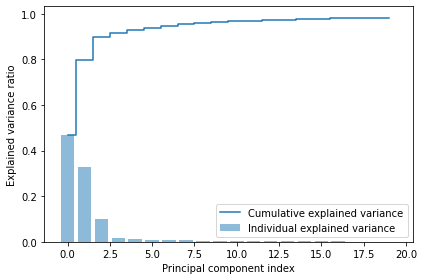

In [ ]:
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,20), exp_var_pca[:20], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,20), cum_sum_eigenvalues[:20], where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print(exp_var_pca[0], exp_var_pca[1])
print(cum_sum_eigenvalues[19])

0.4702868502636428 0.3269544772610907
0.9832962523650608


In [ ]:
pca = PCA(n_components=20)
pca.fit(new_kmer_norm_df)
new_pca = pca.transform(new_kmer_norm_df)

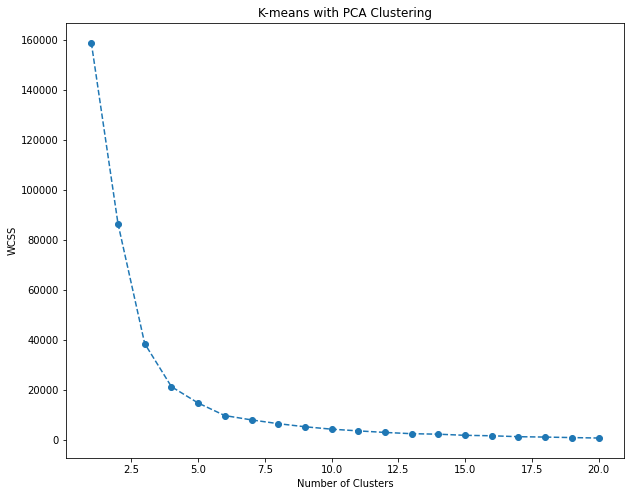

In [ ]:
from sklearn.cluster import KMeans
# Fit KMeans
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(new_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
# keep 3-cluster solution
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(new_pca)

df_segm_pca_kmeans = pd.DataFrame(new_pca)
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans['ID'] = new_kmer_norm_df.index
df_segm_pca_kmeans

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Segment K-means PCA,ID
0,-5.345623,0.250512,-0.192567,-0.754197,-0.772205,-0.074561,0.932690,-0.421366,2.485833,-1.217133,...,-0.022218,0.691062,0.114352,-1.159134,0.210867,0.394380,-0.356635,0.682460,0,407214
1,-5.476111,0.155834,-0.206546,-0.332724,-1.361192,0.511540,0.682867,-0.288924,-0.907058,-0.326004,...,-0.402114,0.071352,-0.193160,-0.196139,-0.096868,0.205367,0.474504,-0.308382,0,411950
2,-5.220102,0.002961,-0.114772,0.152573,-0.230635,-0.012182,-1.306333,0.116391,-0.937371,1.806999,...,0.535118,-0.169417,0.680138,0.254385,-0.807802,-0.525776,0.100322,-0.592395,0,411915
3,-5.214644,0.132923,-0.439555,-0.196241,-0.700498,0.409950,0.924341,-0.659273,-1.139710,-0.189642,...,-0.193305,0.218860,-0.377434,-0.300303,0.069091,0.523953,0.799851,-0.201607,0,408515
4,-5.251848,0.081446,-0.225941,-0.383655,-1.330451,0.526456,0.321038,-0.126144,-1.000922,-0.314543,...,-0.244899,0.261027,0.113275,-0.284490,-0.264723,0.124635,0.302223,-0.288002,0,406970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,-5.534426,0.505780,-0.123168,-0.006372,0.077609,0.702052,0.622571,0.748312,-1.307017,-0.859531,...,-2.173159,-0.342280,-0.217502,0.294723,-0.626061,-0.540007,0.733189,-0.641468,0,403931
154,-5.120415,0.017098,-0.016908,0.070375,-0.394613,0.434874,-1.072463,0.025783,-1.343557,1.573614,...,0.473157,0.059989,0.847067,0.080109,-1.138732,-0.879345,0.239006,-0.994401,0,406535
155,-4.998006,0.090965,-0.201624,0.036664,-0.853866,0.537230,0.147223,-0.767918,-1.782149,0.143231,...,0.012546,0.153290,0.803513,-0.251454,-0.872994,-0.045407,-0.021573,-1.185951,0,412459
156,-5.241972,0.133512,-0.085328,0.015713,-0.399184,0.007006,-1.266676,0.016918,-1.060641,1.692987,...,0.494310,-0.026536,0.715995,0.055958,-0.887832,-0.639334,0.056742,-0.748692,0,412030


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


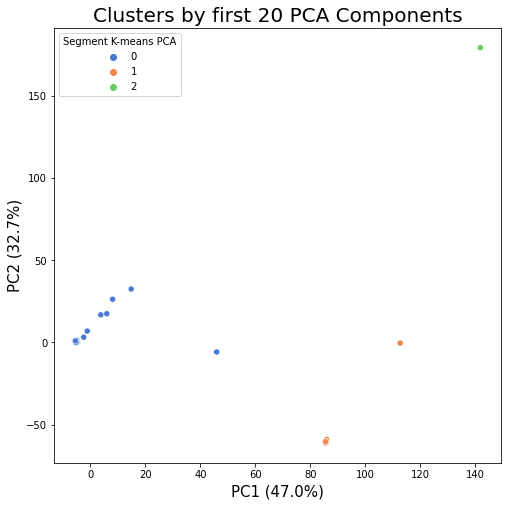

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))
plt.xlabel('PC1 (47.0%)', fontsize = 15)
plt.ylabel('PC2 (32.7%)', fontsize = 15)
plt.title('Clusters by first 20 PCA Components', fontsize = 20)
sns.scatterplot(df_segm_pca_kmeans[0], df_segm_pca_kmeans[1], hue = df_segm_pca_kmeans['Segment K-means PCA'], palette='muted')